## Image Sequence Data Generator

In [1]:
import os
import numpy as np 
import logging 
import glob 
import random

from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
log = logging.getLogger()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
os.system("dot_clean ")
data_dir = "/Volumes/Samsung_T5/lcrc_data"

In [3]:
flir_path = data_dir+"/data_samples/flir"
bottom_path = data_dir+"/data_samples/bottom"
top_path = data_dir+"/data_samples/top"

In [4]:
"""
train_gen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   rotation_range=5.,
                                   horizontal_flip = True)
"""

train_gen = ImageDataGenerator(rescale = 1./255)

def generate_generator_multiple(generator,dir1, dir2, dir3, batch_size, img_height,img_width):
    genX1 = generator.flow_from_directory(dir1,
                                          target_size = (img_height,img_width),
                                          class_mode = 'categorical',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    genX2 = generator.flow_from_directory(dir2,
                                          target_size = (img_height,img_width),
                                          class_mode = 'categorical',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    genX3 = generator.flow_from_directory(dir3,
                                          target_size = (img_height,img_width),
                                          class_mode = 'categorical',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            X3i = genX3.next()
            yield [X1i[0], X2i[0], X3i[0]], X2i[1]  #Yield both images and their mutual label
            
n_frames = 6
n_batchs = 1
            
train_generator=generate_generator_multiple(generator=train_gen,
                                           dir1=flir_path,
                                           dir2=bottom_path,
                                           dir3=top_path,
                                           batch_size=n_frames*n_batches,
                                           img_height=480,
                                           img_width=640) 

In [51]:
X,y = train_generator.__next__()
X_flir, X_bottom ,X_top = X[0], X[1], X[2]
y_flir, y_bottom, y_top = y[0], y[1], y[2]

## Plot flir batch

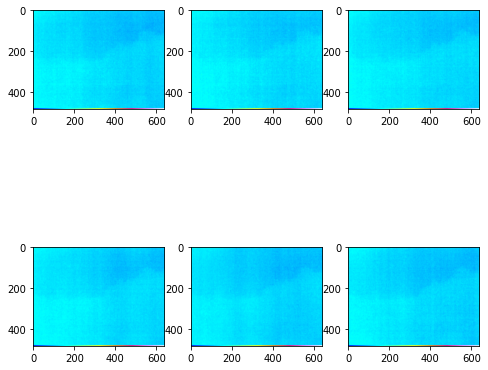

In [52]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_flir[i-1,:,:,:])
plt.show()

## Plot top batch

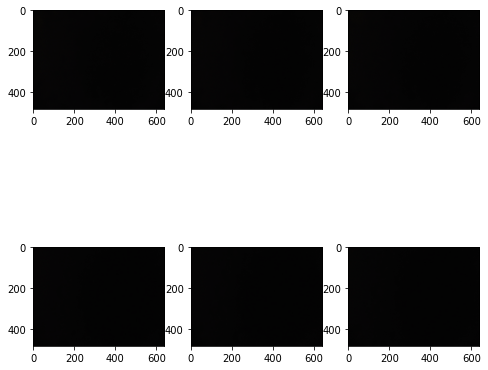

In [53]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_top[i-1,:,:,:])
plt.show()

## Plot bottom batch

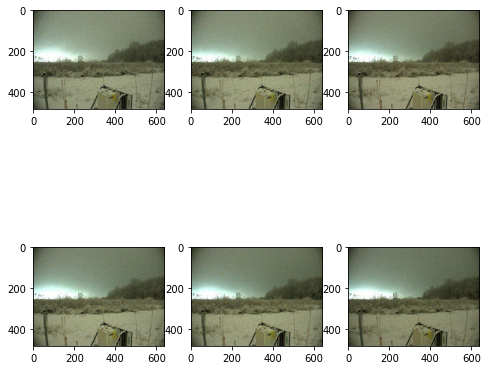

In [54]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_bottom[i-1,:,:,:])
plt.show()

## Target value

In [55]:
print("Top target value: ",y_top)
print("Bottom target value: ",y_bottom)
print("Flir target value: ",y_flir)

Top target value:  [1. 0. 0.]
Bottom target value:  [1. 0. 0.]
Flir target value:  [1. 0. 0.]
